# Exercise 2: Statisics

## Task 1: Data Analysis with Pandas
Make sure you installed the pandas package. Download the Iris Plant Dataset from the UCI Machine Learning Repository:
https://archive.ics.uci.edu/ml/datasets/Iris


In [9]:
import numpy as np
import pandas as pd
import math

### a) Preprocessing and Descriptive Statistics

Read the Iris dataset into a pandas dataframe. Note that you will need to name the columns yourself according to the _attribute information_ on the UCI website above. Print the dataframe and make sure your dataframe has 150 rows.

In [4]:
data = pd.read_csv("iris.data",delimiter=',',names=['sepal_length','sepal_width','petal_length','petal_width','class_name'])
df = pd.DataFrame(data)
# df.columns = ['sepal_length','sepal_width','petal_length','petal_width','class_name']
print(df)

     sepal_length  sepal_width  petal_length  petal_width      class_name
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


Use pandas built-in functions to compute the mean, variance, minimum and maximum of the _sepal length_ of all plants in the datasets

In [24]:
print(df[['sepal_length']].mean(axis=0))
print(df[['sepal_length']].var(axis=0))
print(df[['sepal_length']].min(axis=0))
print(df[['sepal_length']].max(axis=0))

sepal_length    5.843333
dtype: float64
sepal_length    0.685694
dtype: float64
sepal_length    4.3
dtype: float64
sepal_length    7.9
dtype: float64


Write a function that takes a (numerical) column of a pandas dataframe as input and computes its median. Use it to compute the median of the _petal width_ and compare it to the output of pandas built-in median function.

In [6]:
median_num = df.shape[0]/2 - 1
# print(df.loc[[median_num]].values[0][0])
# print(df.iloc[median_num,3])
print(df['petal_width'][median_num])

print(df[['petal_width']].median(axis=0))

1.3
petal_width    1.3
dtype: float64


### b) Pearson's Correlation Coefficient

Write a function that takes two (numerical) pandas columns as input and returns their Pearson correlation coefficient. Do not use any pandas/numpy/scipy built-ins.

In [22]:
def calcPearson(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    n = len(x)
    sumTop = 0.0
    sumBottom = 0.0
    x_pow = 0.0
    y_pow = 0.0
    for i in range(n):
        sumTop += (x[i]-x_mean)*(y[i]-y_mean)
    for i in range(n):
        x_pow += math.pow(x[i]-x_mean,2)
    for i in range(n):
        y_pow += math.pow(y[i]-y_mean,2)
#     sumTop = np.sum((x-x_mean)*(y-y_mean))
#     x_pow = np.sum(math.pow(x-x_mean,2))
#     y_pow = np.sum(math.pow(y-y_mean,2))
    sumBottom = math.sqrt(x_pow*y_pow)
    p = sumTop/sumBottom
    return p

Apply your function to compute the correlation between _sepal length_ and _sepal width_. Check it for correctness by applying the corresponding scipy built-in. 

In [23]:
print(calcPearson(df['sepal_length'],df['petal_length']))
print(df.sepal_length.corr(df.petal_length))

0.8717541573048714
0.8717541573048718


### c) Hypothesis Testing

Compute the mean _sepal width_ for all plants that are classed as _Iris-versicolor_ and for all plants that are classed as _Iris-virginica_ .

In [39]:
df_1 = df[df['class_name'] == 'Iris-versicolor']
df_2 = df[df['class_name'] == 'Iris-virginica']
df_all = df_1.append(df_2)
mean = df_all['sepal_width'].mean(axis=0)
print(mean)

2.8719999999999994


Consider the null hypothesis that there is no difference in the means of the groups. Compute the corresponding _p_-value by shuffling the class labels 100000 times and computing the difference in means each of these times. Do you oberve a significant difference?

In [ ]:
# ? np.random.shuffle

### d) The Bootstrap

We consider the _sepal width_ of all plants in the data that are classed as _Iris-setosa_. Compute the 95% confidence interval of their mean by bootstrapping the data 10000 times. 

In [57]:
df_3 = df[df['class_name'] == 'Iris-versicolor']
print(df_3['sepal_width'])
n = len(df_3)
reps = 10000
xb = np.random.choice(df_3['sepal_width'], (n, reps))
mb = xb.mean(axis=0)
mb.sort()

np.percentile(mb, [0, 95])

50    3.2
51    3.2
52    3.1
53    2.3
54    2.8
55    2.8
56    3.3
57    2.4
58    2.9
59    2.7
60    2.0
61    3.0
62    2.2
63    2.9
64    2.9
65    3.1
66    3.0
67    2.7
68    2.2
69    2.5
70    3.2
71    2.8
72    2.5
73    2.8
74    2.9
75    3.0
76    2.8
77    3.0
78    2.9
79    2.6
80    2.4
81    2.4
82    2.7
83    2.7
84    3.0
85    3.4
86    3.1
87    2.3
88    3.0
89    2.5
90    2.6
91    3.0
92    2.6
93    2.3
94    2.7
95    3.0
96    2.9
97    2.9
98    2.5
99    2.8
Name: sepal_width, dtype: float64


array([2.59 , 2.842])

## Task 2: A Dice Game

Consider the following game of dices: You roll 5 dice, and you get points for each die you roll.
For each one, you get 100 points, for each six, you get 60 points, for all other numbers just the shown value (e.g., you get 3 points for a 3). Your total score is the sum of these points.

### a) Simulation and Plotting

Simulate the game 100,000 times, and save both every single dice roll as well as the resulting score for each of the 100000 rounds. Plot a histogram of outcomes.

In [52]:
import random
import numpy as np
import pandas as pd

def roll (n):
    result = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0}
    for i in range (n):
        r = random.randint(1,6)
        result [r] = result[r] + 1
#     print(result)
    return result

def sum():
    res = [] # sum
    data_all = np.empty(shape=[0, 7]) #sum 1 2 3 4 5 6
    temp = [] # store value of 1 2 3 4 5 6
    for i in range(100000):
        sum = 0
        result = roll(5)
        for i in range(6):
            if i+1 == 1:
                sum += (i+1)*result[i+1]*100
            elif i+1 == 6:
                sum += (i+1)*result[i+1]*10
            else:
                sum += (i+1)*result[i+1]
        res.append(sum)
        temp.append(sum)
        for i in range(6):
            temp.append(result[i+1])
        data_all = np.append(data_all, [temp], axis = 0)
        temp.clear()
    return res,data_all
# print(sum())
# print(np.sum(sum()))

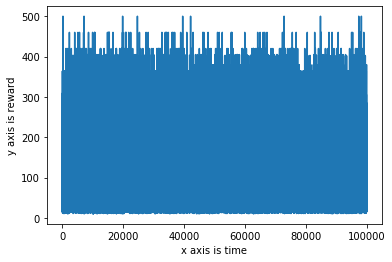

In [53]:
# use matplotlib/pyplot
from matplotlib import pyplot as plt
data,data_all = sum()
df_data_all = pd.DataFrame(data_all,columns=['sum','1','2','3','4','5','6'])
# print(df_data_all)
x = np.arange(len(data))
y = data
# plt.title("Matplotlib demo") 
plt.xlabel("x axis is time")
plt.ylabel("y axis is reward") 
plt.plot(x,y)
plt.show()

### b) Hypothesis Testing pt. 2
Assume that in your initial roll, you scored 268. Is this signficantly above what is to be expected? Compute the corresponding _p_-value.

In [1]:
# ？

### c) Conditional Probability and Bayes Theorem

Based on your simulation, give an estimation of the probability of scoring over 100 points, given that you did not roll a single 1.

In [54]:
p_sum_big_100 = len(df_data_all[df_data_all['sum']>100])/len(df_data_all)
df_1_equal_0 = df_data_all[df_data_all['1']==0]
p_1_equal_0 = len(df_data_all[df_data_all['1']==0])/len(df_data_all)
p_sum_big_100_given_1_equal_0 = len(df_1_equal_0[df_1_equal_0['sum']>100])/len(df_data_all)
print(p_sum_big_100_given_1_equal_0)

0.10555


Now estimate the probability of scoring over 100 points, and apply your previous results and Bayes Theorem to compute the probability of not rolling a 1 given that you score over 100 points.

In [55]:
p_1_equal_0_sum_big_100 = p_sum_big_100_given_1_equal_0 * p_1_equal_0 / p_sum_big_100
print(p_1_equal_0_sum_big_100)

0.06039255190557451
